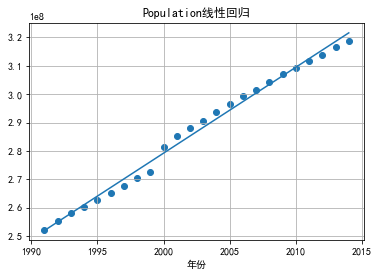

2019年Population预测值： 336803473


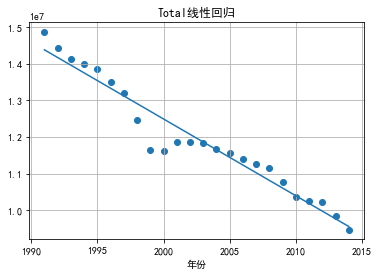

2019年Population预测值：336803473
2019年Total预测值： 8509958
2019年Total犯罪率预测值：2.5267%


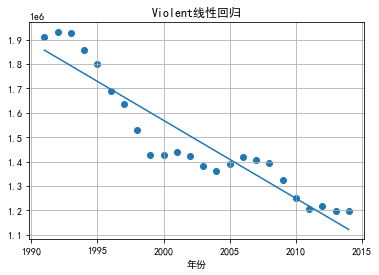

2019年Population预测值：336803473
2019年Violent预测值： 961797
2019年Violent犯罪率预测值：0.2856%


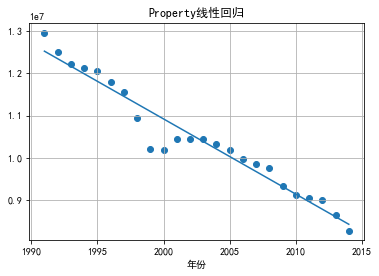

2019年Population预测值：336803473
2019年Property预测值： 7534743
2019年Property犯罪率预测值：2.2371%


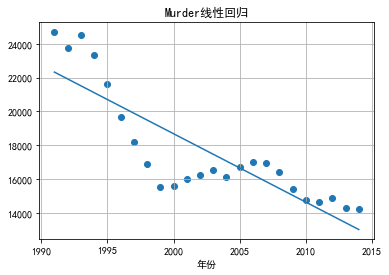

2019年Population预测值：336803473
2019年Murder预测值： 11003
2019年Murder犯罪率预测值：0.0033%


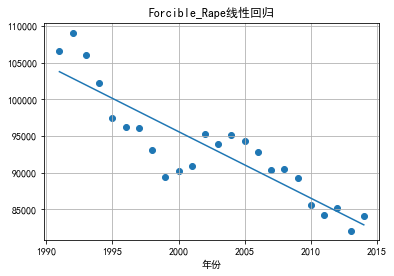

2019年Population预测值：336803473
2019年Forcible_Rape预测值： 78346
2019年Forcible_Rape犯罪率预测值：0.0233%


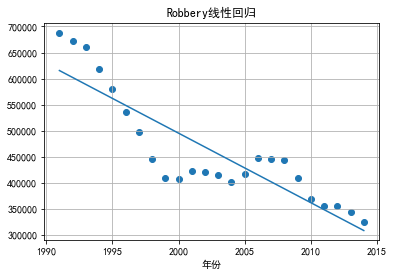

2019年Population预测值：336803473
2019年Robbery预测值： 241981
2019年Robbery犯罪率预测值：0.0718%


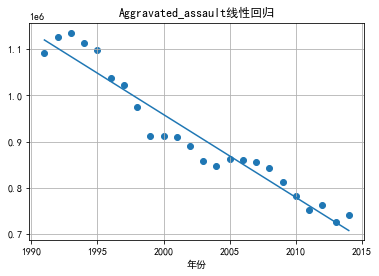

2019年Population预测值：336803473
2019年Aggravated_assault预测值： 617612
2019年Aggravated_assault犯罪率预测值：0.1834%


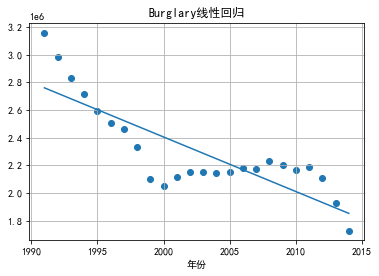

2019年Population预测值：336803473
2019年Burglary预测值： 1656630
2019年Burglary犯罪率预测值：0.4919%


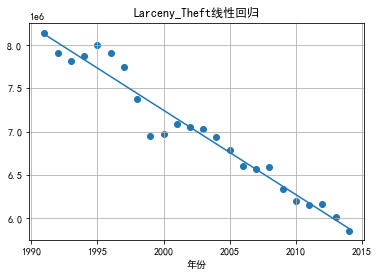

2019年Population预测值：336803473
2019年Larceny_Theft预测值： 5395802
2019年Larceny_Theft犯罪率预测值：1.6021%


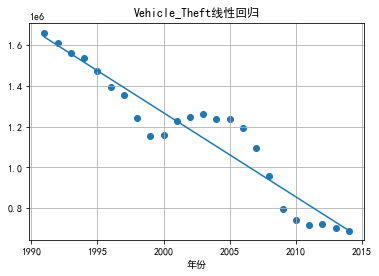

2019年Population预测值：336803473
2019年Vehicle_Theft预测值： 482845
2019年Vehicle_Theft犯罪率预测值：0.1434%


In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False #显示负号
plt.rcParams['font.sans-serif']=['SimHei'] #中文显示

data = pd.read_csv(r"US_Crime_Rates_1960_2014.csv")#读取数据文件
data = data[(data["Year"]>=1991)]#取1991以后数据
Population=0
for k in data.columns[1:]:#遍历各犯罪字段
    x = data["Year"]
    y = data[k]
    slope,intercept,r,p,std_err=stats.linregress(x,y)#回归拟合，取模型参数
    def myfunc(x):#回归函数
        return slope*x+intercept
    mymodel = list(map(myfunc,x))
    plt.scatter(x,y)#绘制散点图
    plt.plot(x,mymodel)#回归线
    plt.title("{}线性回归".format(k))#标题
    plt.xlabel("年份")#x轴标题
    plt.grid()#网格线
    plt.show()#绘图
    num = int(myfunc(2019))#预测值
    if k == "Population":
        print("2019年{}预测值：".format(k),num)
        Population = num#2019人数预测
    else:
        print("2019年Population预测值：{}".format(Population))#2019人数预测
        print("2019年{}预测值：".format(k),num)#预测值
        print("2019年{}犯罪率预测值：{}%".format(k,round(100*num/Population,4)))#计算犯罪率
        